# Atividade Extra - Classificando Cães e Gatos

### Reconhecendo Cães e Gatos

Este é um algoritmo de classificação de imagens utilizando Keras com CNN. Neste exemplo, vamos treinar o algoritmo para que ele possa reconhecer se a imagem é de um gato ou de um cachorro. Para isto, vamos utilizar o dataset disponível no seguinte link: https://www.kaggle.com/c/dogs-vs-cats/data

Descompacte o arquivo dogs-vs-cats.zip no diretório do seu script, deixando os diretórios da seguinte forma:

Diretorio Jupyter Notebook:

    (Seu algoritmo de classificacao).py
    dataset
        -> test
        -> train
        -> sampleSubmission.csv

### Item 1

In [1]:
import os, random
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
import tensorflow as tf
import keras 
import keras.backend as K
from keras.layers import Dense, Conv2D, Input, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.models import Model, Sequential
from keras.datasets import fashion_mnist
from keras.callbacks import ModelCheckpoint
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import cm
%matplotlib inline

Using TensorFlow backend.


### Item 2

In [2]:
# Batch size
batch_size = 64 

# Número de classes
qtd_class = 2  

# Número de ciclos de treinamento
qtd_ciclos = 10

# Altura e largura das imagens
img_h, img_w = 64, 64 

# Quantidade de Imagens na exibicao final
qtd_l, qtd_c = 8, 4

#Diretorio de Treino
dir_treino = './dataset/train/'

#Diretorio de Teste
dir_teste = './dataset/test/'

### Item 3

In [3]:
def ler_imagem(file):
    img = cv2.imread(file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imres = cv2.resize(gray, (img_h, img_w), interpolation=cv2.INTER_CUBIC)
    imres = image.img_to_array(imres.T)
    imres = np.expand_dims(imres, axis = 0)    
    return imres

### Item 4

In [4]:
def gerar_dataset(filenames):
    rotulos = []
    dataset = np.ndarray((len(filenames), img_h, img_w, 1), dtype=np.uint8)
    x = 0
    for arquivo in filenames:
        dataset[x] = ler_imagem(arquivo)
        if '/cat.' in arquivo: 
            rotulos.append(0)
        else:
            rotulos.append(1)
        x = x + 1
        if x%10==0:
            print("Processados " + str(x), end='\r', flush=True)
    return dataset, rotulos

imagens_treino = [dir_treino+i for i in os.listdir(dir_treino) if '.jpg' in i]
random.shuffle(imagens_treino)
imagens_teste  = [dir_teste+i for i in os.listdir(dir_teste) if '.jpg' in i]
x_treino, y_treino = gerar_dataset(imagens_treino)
x_teste, y_teste  = gerar_dataset(imagens_teste)

### Item 5

In [5]:
# Normaliza os valores dos pixels
x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')
x_treino /= 255.0
x_teste /= 255.0

# Converte os rótulos para "One-hot encoding": 
y_treino = keras.utils.to_categorical(y_treino, qtd_class)
y_teste = keras.utils.to_categorical(y_teste, qtd_class)

# Cria o modelo executando um treino e avaliação:
im = ler_imagem(imagens_treino[0])

def conv3x3(input_x,nb_filters):
    # Prepara a camada convolucional
    return Conv2D(nb_filters, kernel_size=(3,3), use_bias=False,
               activation='relu', padding="same")(input_x)

### Item 6

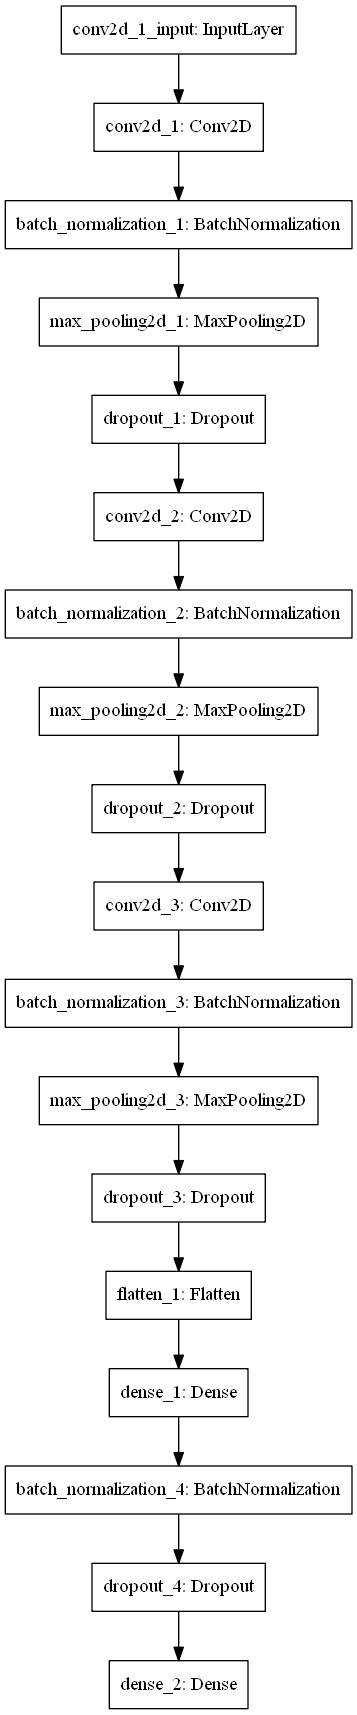

In [6]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_h, img_w, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

tf.keras.utils.plot_model(model)

### Item 7

In [7]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

### Item 8

In [8]:
# Cria um callback para salvar o modelo a cada "epoch" de treinamento completada: 
callback = ModelCheckpoint('dogs_cats_saved.h5')

data_generator = ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

history = model.fit_generator(
    generator=data_generator.flow(x=x_treino, y=y_treino, batch_size=batch_size),
    steps_per_epoch=len(x_treino) // batch_size,
    epochs=qtd_ciclos,
    validation_data=(x_teste, y_teste),
    workers=4,
    verbose=1,
    callbacks=[callback]
)

Epoch 1/10
390/390 [==============================] - 49s 127ms/step - loss: 0.8188 - accuracy: 0.5780 - val_loss: 1.3191 - val_accuracy: 0.0432
Epoch 2/10
390/390 [==============================] - 45s 114ms/step - loss: 0.6399 - accuracy: 0.6382 - val_loss: 0.5936 - val_accuracy: 0.6941
Epoch 3/10
390/390 [==============================] - 46s 118ms/step - loss: 0.6207 - accuracy: 0.6605 - val_loss: 0.6049 - val_accuracy: 0.6667
Epoch 4/10
390/390 [==============================] - 45s 114ms/step - loss: 0.6095 - accuracy: 0.6648 - val_loss: 1.2135 - val_accuracy: 0.3438
Epoch 5/10
390/390 [==============================] - 45s 115ms/step - loss: 0.5969 - accuracy: 0.6827 - val_loss: 1.3331 - val_accuracy: 0.3070
Epoch 6/10
390/390 [==============================] - 48s 122ms/step - loss: 0.5868 - accuracy: 0.6916 - val_loss: 0.7195 - val_accuracy: 0.6278
Epoch 7/10
390/390 [==============================] - 46s 118ms/step - loss: 0.5795 - accuracy: 0.6998 - val_loss: 0.3365 - val_ac

### Item 9

Perda: 0.770142244644165
Acurácia: 0.6438400149345398


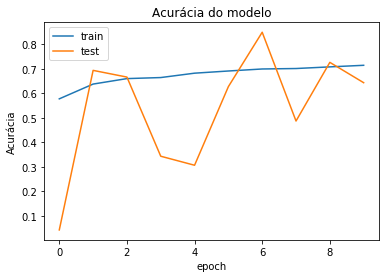

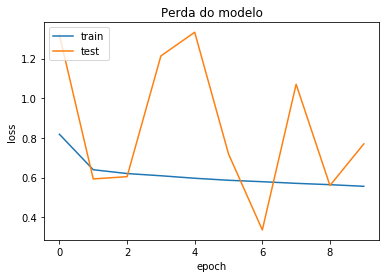

In [9]:
# Avalia o modelo com dados de teste:
score = model.evaluate(x_teste, y_teste, verbose=0)
print('Perda:', score[0])
print('Acurácia:', score[1])

# Plota gráficos de perda e acurácia: 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perda do Modelo')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Item 10

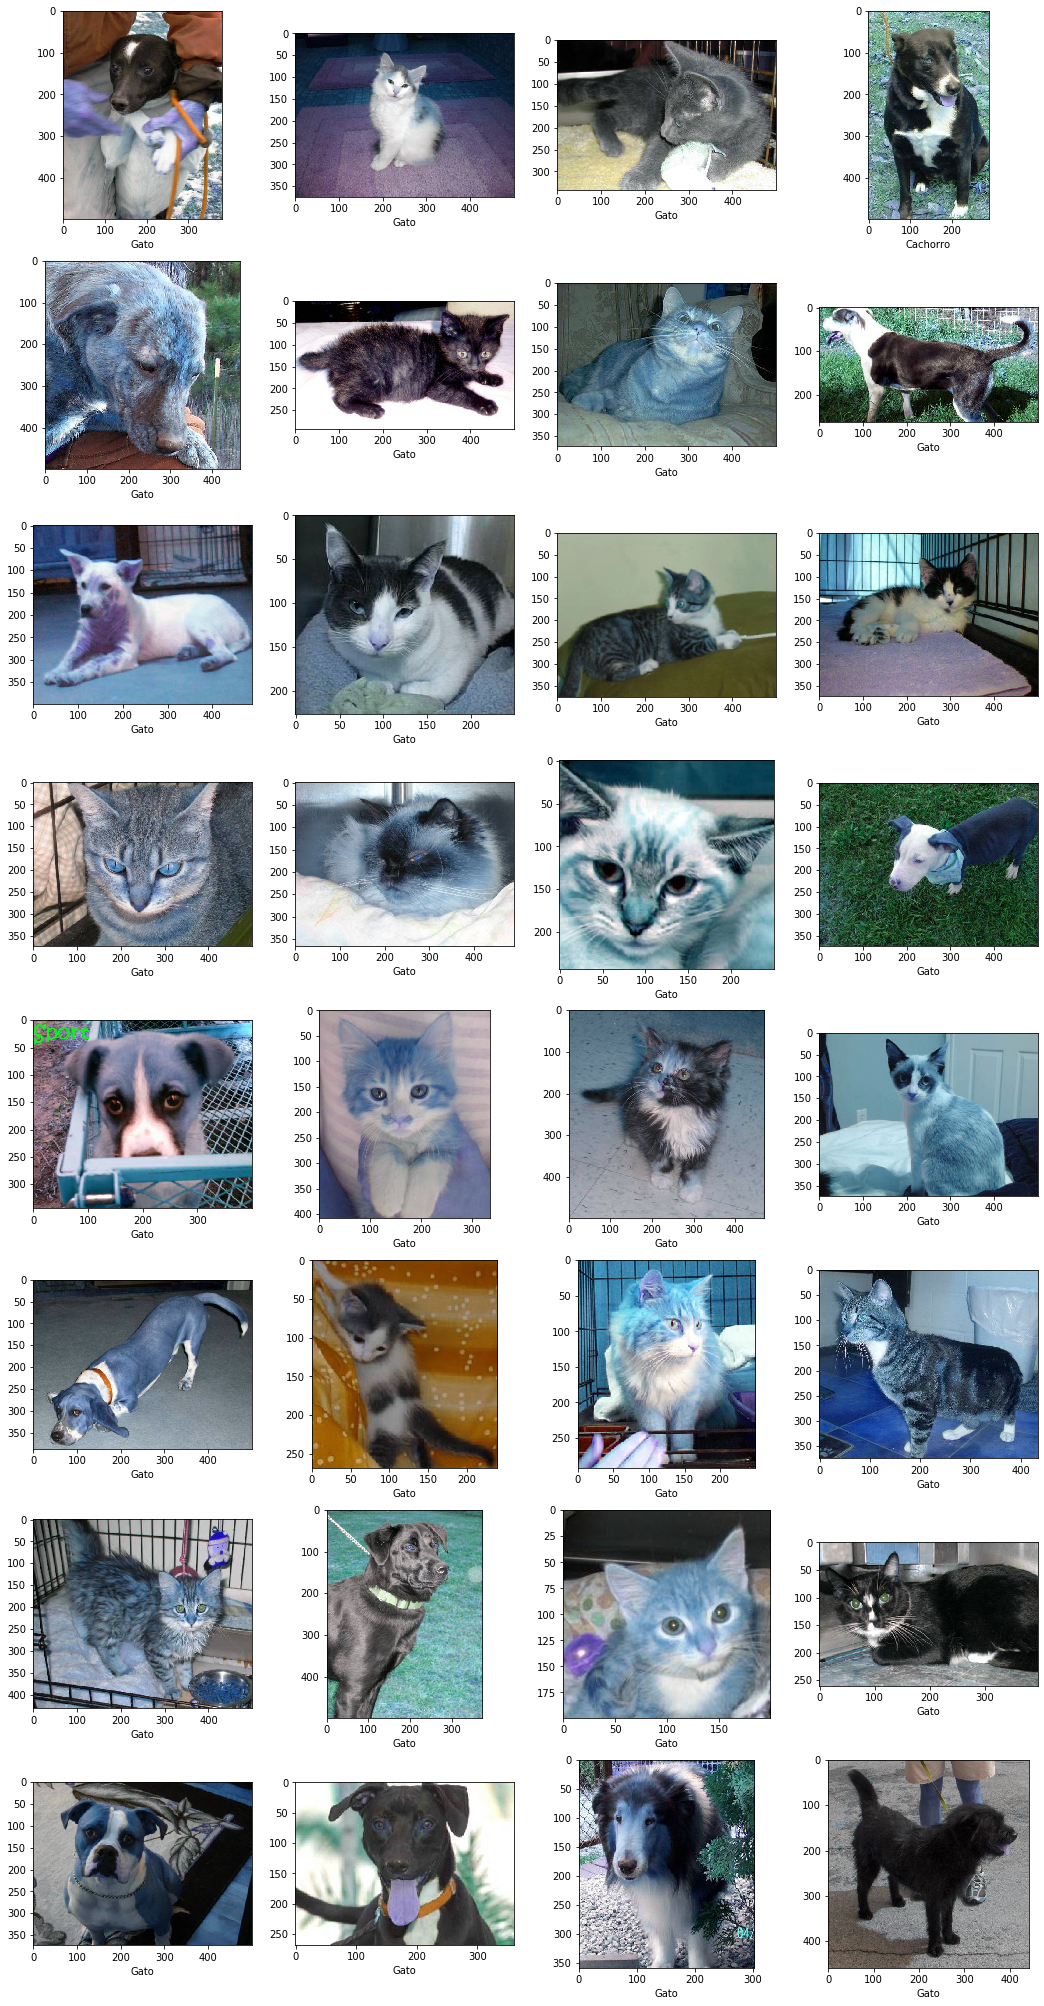

In [10]:
nomes = [dir_teste+i for i in os.listdir(dir_teste) if '.jpg' in i]

def prepararImagem(imagem):
    test_image = image.img_to_array(imagem.T)
    test_image = np.expand_dims(test_image, axis = 0)    
    return test_image

def mostraCateg(resultado):
    categs = ["Gato", "Cachorro"]
    for idx, val in enumerate(resultado[0]):
        if round(val, 0) == 1:
            return categs[idx]

plt.figure(figsize=(18, 36))
i = 1
for nome in nomes:
    im = cv2.imread(nome)
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    imres = cv2.resize(gray, (img_h, img_w), interpolation=cv2.INTER_CUBIC)
    dados = prepararImagem(imres)
    plt.subplot(qtd_l, qtd_c, i)
    i = i + 1
    ret = model.predict(dados, batch_size=1)
    plt.imshow(im,cmap='gray')
    plt.xlabel(str(mostraCateg(ret)))
    if(i>qtd_l*qtd_c):
        break

### Atividade Extra

Estas atividades foram criadas para melhorar o entendimento do conteúdo apresentado. Neste notebook, veremos muitos dos conceitos apresentados para vocês em todas as Unidades. No próximo video, explicarei para vocês as respostas para as perguntas. 

***1. Renomeie cada item com suas respectivas descrições:***

* Função para Leitura de Imagem
* Definição de parâmetros para normalização das imagens
* Definição do Modelo
* Importando Bibliotecas
* Definindo parâmetros de treinamento
* Treinando o modelo
* Plotagem dos resultados
* Função para geração de Dataset
* Compilação do Modelo
* Plotagem dos gráficos de métricas

***2. Podemos melhorar Acurácia do Modelo e diminuir a Perda do Modelo?***

***3. Se observarmos o resultado dos testes, veremos que o algoritmo classificou corretamente a imagem com seu rótulo, mas existem algumas classificações incoerentes, como podemos corrigir isso?***

***4. Foi definido o número de EPOCH/CICLO=10, se aumentarmos para 100, vocês acreditam que o algoritmo vai melhorar a classificação das imagens?***

***5. Se aumentarmos o número de EPOCH/CICLO para 500, qual seria o resultado?***